## Exploratory Data Analysis

### Graded Project Week 2

### --------------------------------  Part 1 --------------------------------  

**1. Import necessary libraries and read the provided dataset (online_sales.csv). (1
point)**


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True) # add nice colors
%matplotlib inline


df = pd.read_csv("online_sales-1.csv")

**2. Check top 5 and random 5 samples of the dataframe. (1 point)**

In [43]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [44]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
69412,541970,22472,TV DINNER TRAY DOLLY GIRL,3,1/24/11 13:48,4.95,15179.0,United Kingdom
22684,538177,21481,FAWN BLUE HOT WATER BOTTLE,2,12/10/10 9:51,5.91,NaN,United Kingdom
142924,548655,20754,RETROSPOT RED WASHING UP GLOVES,6,4/1/11 13:47,2.10,15605.0,United Kingdom
108497,545543,84378,SET OF 3 HEART COOKIE CUTTERS,12,3/3/11 14:43,1.25,13476.0,United Kingdom
36451,539451,90173,PAIR BUTTERFLY HAIR CLIPS,1,12/17/10 16:59,3.81,NaN,United Kingdom


**3. Check info of the dataframe and write your observations. Comment on data
types and shape of the dataset. (1 points)**


In [45]:
df.shape

(240007, 8)

In [46]:
print("Number of rows: ",df.shape[0], 
      "\nNumber of columns: ",df.shape[1])

Number of rows:  240007 
Number of columns:  8


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240007 entries, 0 to 240006
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    240007 non-null  object 
 1   StockCode    240007 non-null  object 
 2   Description  239106 non-null  object 
 3   Quantity     240007 non-null  int64  
 4   InvoiceDate  240007 non-null  object 
 5   UnitPrice    240007 non-null  float64
 6   CustomerID   172782 non-null  float64
 7   Country      240007 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 14.6+ MB


In [48]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,240007.000000,240007.000000,172782.000000
mean,9.277646,5.124265,15274.819941
std,223.061608,119.992279,1725.093177
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13842.000000
50%,3.000000,2.100000,15132.000000
75%,10.000000,4.210000,16814.000000
max,74215.000000,38970.000000,18287.000000


In [49]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,240007,12468,537434,675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,240007,3645,85123A,1294,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,239106,3617,WHITE HANGING HEART T-LIGHT HOLDER,1319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,240007.0,NaN,NaN,NaN,9.277646,223.061608,-74215.0,1.0,3.0,10.0,74215.0
InvoiceDate,240007,11240,12/6/10 16:57,675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,240007.0,NaN,NaN,NaN,5.124265,119.992279,0.0,1.25,2.1,4.21,38970.0
CustomerID,172782.0,NaN,NaN,NaN,15274.819941,1725.093177,12346.0,13842.0,15132.0,16814.0,18287.0
Country,240007,38,United Kingdom,220279,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# check dublicates
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 1970


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/10 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/10 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/10 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/10 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/10 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
238930,557960,23138,SINGLE WIRE HOOK IVORY HEART,2,6/23/11 19:46,1.45,15453.0,United Kingdom
239419,558049,10133,COLOURING PENCILS BROWN TUBE,1,6/24/11 14:16,0.42,15850.0,United Kingdom
239430,558049,21788,KIDS RAIN MAC BLUE,1,6/24/11 14:16,0.85,15850.0,United Kingdom
239435,558049,22961,JAM MAKING SET PRINTED,1,6/24/11 14:16,1.45,15850.0,United Kingdom


In [51]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
238032,558077,47590A,BLUE HAPPY BIRTHDAY BUNTING,12,6/26/11 10:59,5.45,13408.0,United Kingdom
238033,558077,82600,NO SINGING METAL SIGN,12,6/26/11 10:59,2.10,13408.0,United Kingdom
238034,558077,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,6/26/11 10:59,2.55,13408.0,United Kingdom
238035,558077,22746,POPPY'S PLAYHOUSE LIVINGROOM,12,6/26/11 10:59,2.10,13408.0,United Kingdom


##### Observations:

- Dataset has 8 columns and 240,007 rows
- The dataset consist float, int,  and object data types. However, InvoiceNo is consider to be numeric type.
- The dataset provided is for about 2-year invoice cycle period.
- Minimum values of Quantity fields have negative values. This seems to be an wrong invoice.
- In dataset were 1970 dublicates, and I have successfuly delete them.



**4. Check for null values and report the percentage of null values of each column.
And drop the rows having null values in it. (1 points)**


Treat missing values

In [52]:
# calculating percentage of null values 
df.isnull().mean() * 100 

InvoiceNo       0.000000
StockCode       0.000000
Description     0.378513
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     28.231325
Country         0.000000
dtype: float64

In [53]:
df[df.isna().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/10 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/10 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/10 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/10 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
239903,558068,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,6/24/11 15:51,4.95,NaN,United Kingdom
239904,558068,22208,WOOD STAMP SET THANK YOU,6,6/24/11 15:51,0.83,NaN,United Kingdom
239905,558068,22970,LONDON BUS COFFEE MUG,6,6/24/11 15:51,2.55,NaN,United Kingdom
239906,558068,22300,COFFEE MUG DOG + BALL DESIGN,3,6/24/11 15:51,2.55,NaN,United Kingdom


In [54]:
# I suppose that data with null CustomerID is considered to be invalid
# so I drop these 25 null values

df = df.dropna(axis=0)

In [55]:
# check null values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [56]:
df.sort_values('Description')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
160498,550459,72800B,4 PURPLE FLOCK DINNER CANDLES,1,4/18/11 13:17,2.55,18116.0,United Kingdom
104525,545186,72800B,4 PURPLE FLOCK DINNER CANDLES,1,2/28/11 15:05,2.55,17841.0,United Kingdom
7526,537044,72800B,4 PURPLE FLOCK DINNER CANDLES,12,12/5/10 10:52,2.55,18055.0,United Kingdom
72021,542226,72800B,4 PURPLE FLOCK DINNER CANDLES,1,1/26/11 13:20,2.55,17075.0,United Kingdom
144795,548808,72800B,4 PURPLE FLOCK DINNER CANDLES,3,4/4/11 12:55,2.55,17774.0,United Kingdom
...,...,...,...,...,...,...,...,...
197076,553889,23137,ZINC WIRE SWEETHEART LETTER TRAY,4,5/19/11 16:31,3.75,13405.0,United Kingdom
208394,555110,23137,ZINC WIRE SWEETHEART LETTER TRAY,2,5/31/11 14:34,3.75,17841.0,United Kingdom
171004,551351,23137,ZINC WIRE SWEETHEART LETTER TRAY,24,4/28/11 10:20,3.29,14298.0,United Kingdom
168270,551014,23137,ZINC WIRE SWEETHEART LETTER TRAY,4,4/26/11 11:04,3.75,13209.0,United Kingdom


**5. Check statistical summary of the dataset. (1 point)**


In [57]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,170836,10436,547063,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,170836,3282,85123A,1153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,170836,3374,WHITE HANGING HEART T-LIGHT HOLDER,1153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,170836.0,NaN,NaN,NaN,12.35249,259.358465,-74215.0,2.0,6.0,12.0,74215.0
InvoiceDate,170836,9735,5/22/11 13:01,291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,170836.0,NaN,NaN,NaN,3.807575,101.643556,0.0,1.25,1.95,3.75,38970.0
CustomerID,170836.0,NaN,NaN,NaN,15268.556423,1725.892594,12346.0,13821.0,15125.0,16813.0,18287.0
Country,170836,37,United Kingdom,151687,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**6. Drop the instances having quantity less than zero. (1 point)**


In [58]:
#checking the instances having quantity less than zero
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
239211,C558029,20727,LUNCH BAG BLACK SKULL.,-1,6/24/11 11:47,1.65,12826.0,United Kingdom
239549,C558059,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,-1,6/24/11 15:03,4.95,14194.0,United Kingdom
239550,C558059,82600,NO SINGING METAL SIGN,-2,6/24/11 15:03,1.85,14194.0,United Kingdom
239551,C558060,22988,SOLDIERS EGG CUP,-1,6/24/11 15:05,1.06,17809.0,United Kingdom


In [59]:
# droping the instances 
df.drop(df[df['Quantity'] < 0].index, inplace = True)

In [60]:
# check if instances with negative value are dropped
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [61]:
# after droping indexes we need to reset the index
df.reset_index(drop=True, inplace = True)

In [62]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
166741,558077,47590A,BLUE HAPPY BIRTHDAY BUNTING,12,6/26/11 10:59,5.45,13408.0,United Kingdom
166742,558077,82600,NO SINGING METAL SIGN,12,6/26/11 10:59,2.10,13408.0,United Kingdom
166743,558077,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,6/26/11 10:59,2.55,13408.0,United Kingdom
166744,558077,22746,POPPY'S PLAYHOUSE LIVINGROOM,12,6/26/11 10:59,2.10,13408.0,United Kingdom


**7. Check unique values of the country and report the name of the country that has
the highest number of instances. (2 points)**

In [63]:
# unique countries
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'Unit'], dtype=object)

In [64]:
df['Country'].value_counts()

United Kingdom          148130
Germany                   3952
France                    3559
EIRE                      2648
Netherlands               1139
Spain                     1131
Belgium                    914
Switzerland                697
Australia                  629
Portugal                   610
Norway                     368
Channel Islands            363
Cyprus                     349
Finland                    307
Italy                      299
Japan                      230
Sweden                     195
Denmark                    184
Poland                     180
Austria                    124
Singapore                  113
Iceland                    102
Greece                      85
Unspecified                 72
Canada                      68
Malta                       45
Lebanon                     45
Lithuania                   35
Brazil                      32
European Community          31
United Arab Emirates        30
USA                         22
Bahrain 

**8. Create a new column with the name as ‘sales’ having total sales. The total sales
is defined as Quantity*UnitPrice. (3 points)**

In [65]:
df['sales'] = df['Quantity'] * df['UnitPrice']

In [66]:
#checking if sales column is created
df.sort_values('sales', ascending =False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
36527,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom,77183.60
153601,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,6/10/11 15:28,649.50,15098.0,United Kingdom,38970.00
116879,551697,POST,POSTAGE,1,5/3/11 13:46,8142.75,16029.0,United Kingdom,8142.75
108215,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,4/18/11 13:20,2.10,15749.0,United Kingdom,6539.40
32204,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,1/11/11 12:55,2.10,15749.0,United Kingdom,6539.40


**9. Report the top 5 countries in terms of sales. (2 points)**

**- a. Consider the size of sales.**

**- b. Consider the mean value of sales.**

In [67]:
# top 5 countries in terms of size of sales
df.groupby(["Country"]).sum().sort_values("sales", ascending=False).head(5)

,Quantity,UnitPrice,CustomerID,sales
Country,,,,
United Kingdom,1828421,464706.251,2.302341e+09,3158747.931
Netherlands,88881,2859.740,1.629839e+07,125816.110
Germany,53280,14259.350,4.990668e+07,106113.540
EIRE,48912,14600.640,3.888221e+07,101386.020
France,49637,13150.790,4.510949e+07,89336.880


In [68]:
# top 5 countries in terms of mean of sales
df.groupby(["Country"]).mean().sort_values("sales", ascending=False).head(5)

,Quantity,UnitPrice,CustomerID,sales
Country,,,,
Australia,79.117647,3.428188,12464.344992,126.771526
Netherlands,78.034241,2.510746,14309.388938,110.461905
Japan,79.000000,1.950217,12756.065217,100.181609
Singapore,21.946903,57.363805,12744.000000,90.819912
Sweden,83.358974,3.846718,14841.671795,86.532205


**10. Report the top 5 products which bring the highest sales. Use StockCode for
product information. (2 points)**

In [69]:
df.groupby(["StockCode"]).sum().sort_values("sales", ascending=False).head(5)

,Quantity,UnitPrice,CustomerID,sales
StockCode,,,,
22423,7402,11841.70,14370852.0,84533.50
23166,75389,70.61,869904.0,78499.90
85123A,21807,3241.63,17603760.0,58886.37
22502,1451,2555.20,3359708.0,47150.00
47566,9095,3773.50,11978481.0,40474.55


**11. Convert the ‘InvoiceDate’ into a date format and report the month on which
the maximum sales occur? (5 points)**

In [70]:
df["InvoiceDate"]= pd.to_datetime(df["InvoiceDate"])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166746 entries, 0 to 166745
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    166746 non-null  object        
 1   StockCode    166746 non-null  object        
 2   Description  166746 non-null  object        
 3   Quantity     166746 non-null  int64         
 4   InvoiceDate  166746 non-null  datetime64[ns]
 5   UnitPrice    166746 non-null  float64       
 6   CustomerID   166746 non-null  float64       
 7   Country      166746 non-null  object        
 8   sales        166746 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 11.4+ MB


In [72]:
df.groupby(pd.DatetimeIndex(df['InvoiceDate']).month).sum().sort_values("sales", ascending=False).head(1)

,Quantity,UnitPrice,CustomerID,sales
InvoiceDate,,,,
5,372948,101500.91,427293897.0,677355.15


**12. Check statistical summary of the sales and use an appropriate plot to display
the distribution of sales and write your inferences. (2 points)**

In [73]:
df['sales'].describe()

count    166746.000000
mean         23.267779
std         224.850893
min           0.000000
25%           5.040000
50%          12.750000
75%          19.800000
max       77183.600000
Name: sales, dtype: float64

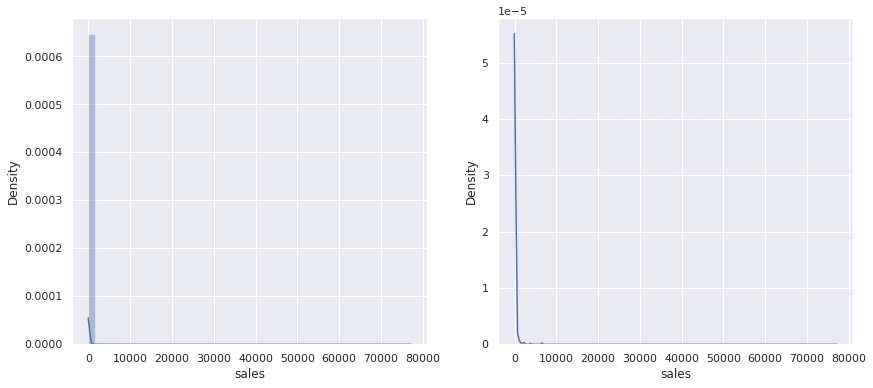

In [74]:
fig_size = (14, 6)
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=fig_size)
sns.distplot(df['sales'], kde=True, ax=axs[0])
sns.kdeplot(df['sales'], ax=axs[1])
plt.show()

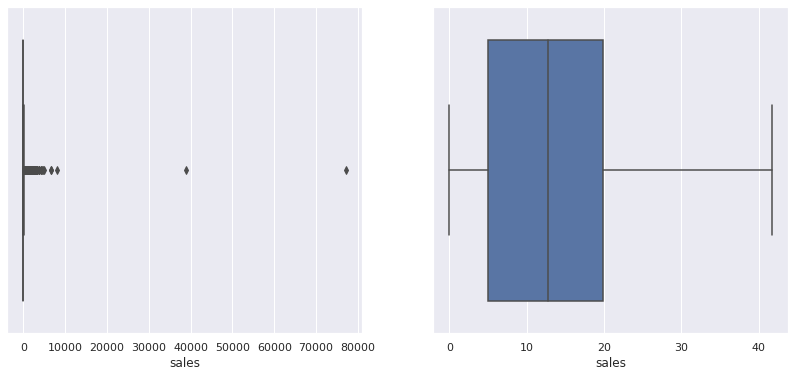

In [75]:
fig_size = (14, 6)
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=fig_size)
sns.boxplot(x= 'sales', data=df, ax=axs[0])
sns.boxplot(x= 'sales', data=df, showfliers=False, ax=axs[1])
plt.show()

In [76]:
df.describe()

,Quantity,UnitPrice,CustomerID,sales
count,166746.000000,166746.000000,166746.000000,166746.000000
mean,13.423009,3.294358,15276.477787,23.267779
std,187.526625,24.342004,1725.706925,224.850893
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13842.000000,5.040000
50%,6.000000,1.950000,15134.000000,12.750000
75%,12.000000,3.750000,16814.000000,19.800000
max,74215.000000,8142.750000,18287.000000,77183.600000


In [77]:
df.shape

(166746, 9)

**13. Submit a business report including your findings and interpretations of the
above project. Please refer to the do’s and don’t document for more
information. (3 points)**

### --------------------------------  Part 2 --------------------------------  

**1. Import necessary libraries. (1 point)**

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

sns.set(color_codes=True) # add nice colors
%matplotlib inline

**2. Load the file and display the first 5 and last 5 instances. (1 point)**

In [79]:
df1 = pd.read_csv("marketing_data.csv")
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [80]:
df1.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND
2239,4070,1969,PhD,Married,"$94,871.00",0,2,9/1/12,99,169,...,4,7,0,1,1,0,0,1,0,CA


**3. Check the shape of the data (number of rows and column). (1 point)**

In [81]:
print("Number of rows: ",df1.shape[0], 
      "\nNumber of columns: ",df1.shape[1])

Number of rows:  2240 
Number of columns:  28


**4. Generate pandas profiling report of the original data. (2 points)**

In [82]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df1, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [83]:
df1.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**5. Check the dtype of values in column 'Income'. (1 point)**

In [84]:
# dtype('O') = 'object'
df1[' Income '].dtype

dtype('O')

**6. Convert the values in the 'Income' column to numeric format. (2 points)**

In [85]:
# change column name ' Income ' to 'Income'
df1.rename({' Income ': 'Income'}, axis=1, inplace=True)
df1['Income']

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

In [86]:
# delete all $ and comas in string 
# and convert it to "float"
df1['Income'] = df1['Income'].str.replace('$', '')
df1['Income'] = df1['Income'].str.replace(',', '').astype(float)

In [87]:
df1['Income'].dtype

dtype('float64')

**7. Check the distribution of the income column. (1 point)**

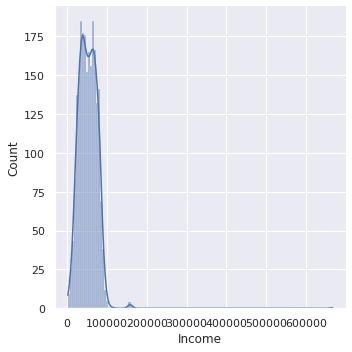

In [88]:
sns.displot(df1, x="Income", kde=True);

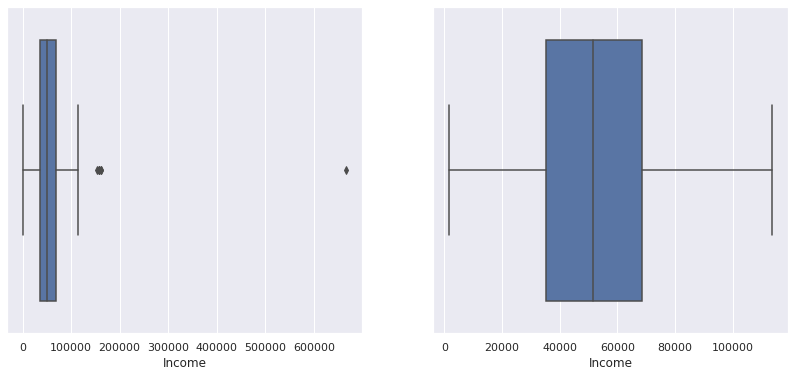

In [89]:
fig_size = (14, 6)
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=fig_size)
sns.boxplot(x='Income', data=df1, ax=axs[0])
sns.boxplot(x='Income', data=df1, showfliers=False, ax=axs[1])
plt.show()

In [90]:
df1['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

**8. Check the presence of outliers in the feature 'Income'. (1 point)**

In [91]:
# Method Z Score
df1['Income_zscore'] = (df1['Income'] - df1['Income'].mean() ) / df1['Income'].std()
df1['Income_zscore'].describe()

count    2.216000e+03
mean     3.256521e-17
std      1.000000e+00
min     -2.006797e+00
25%     -6.731101e-01
50%     -3.439196e-02
75%      6.465141e-01
max      2.440777e+01
Name: Income_zscore, dtype: float64

In [92]:
df1[df1['Income_zscore']> 3]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income_zscore
325,4931,1977,Graduation,Together,157146.0,0,0,4/29/13,13,1,...,1,0,0,0,0,0,0,0,SA,4.167101
497,1501,1982,PhD,Married,160803.0,0,0,8/4/12,21,55,...,0,0,0,0,0,0,0,0,US,4.312375
527,9432,1977,Graduation,Together,666666.0,1,0,6/2/13,23,9,...,6,0,0,0,0,0,0,0,SA,24.407773
731,1503,1976,PhD,Together,162397.0,1,1,6/3/13,31,85,...,1,0,0,0,0,0,0,0,SP,4.375697
853,5336,1971,Master,Together,157733.0,1,0,6/4/13,37,39,...,1,0,0,0,0,0,0,0,SP,4.190419
1826,5555,1975,Graduation,Divorced,153924.0,0,0,2/7/14,81,1,...,0,0,0,0,0,0,0,0,SP,4.039107
1925,11181,1949,PhD,Married,156924.0,0,0,8/29/13,85,2,...,0,0,0,0,0,0,0,0,CA,4.158282
2204,8475,1973,PhD,Married,157243.0,0,1,3/1/14,98,20,...,0,0,0,0,0,0,0,0,IND,4.170954


In [93]:
df1[df1['Income_zscore']< -3]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income_zscore


In [94]:
df1[df1['Income_zscore']> 3]['Income']

325     157146.0
497     160803.0
527     666666.0
731     162397.0
853     157733.0
1826    153924.0
1925    156924.0
2204    157243.0
Name: Income, dtype: float64

In [95]:
# Let us calculate the value for Income if ZScore has to be 3
income_impute_value = (3 * df1['Income'].std()) + df1['Income'].mean()
max_val = round(income_impute_value,2)
max_val

127766.48

In [96]:
list_index = df1[df1['Income_zscore']> 3].index
list_index

Int64Index([325, 497, 527, 731, 853, 1826, 1925, 2204], dtype='int64')

In [97]:
df1['Income'] = np.where(df1.index.isin(list_index), max_val, df1['Income'])

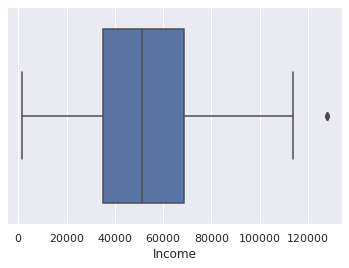

In [98]:
sns.boxplot(x=df1['Income']);

In [99]:
df1['Income'].describe()

count      2216.000000
mean      51908.485939
std       21174.352145
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      127766.480000
Name: Income, dtype: float64

In [100]:
df1.drop(['Income_zscore'], axis=1, inplace=True)

**9. Encode categorical features to numerical. (3 points)**

- Convert the column 'Education' from categorical to numerical format. Map them as Basic=1, Graduation=2, Master=3, PhD=4, 2n Cycle=5

- Check the number of unique values in the column "Country"

In [101]:
df1['Education'].replace({'Basic': 1, 'Graduation': 2, "Master": 3, 'PhD': 4, '2n Cycle':5}, inplace=True)
df1['Education']

0       2
1       2
2       2
3       2
4       2
       ..
2235    4
2236    5
2237    2
2238    2
2239    4
Name: Education, Length: 2240, dtype: int64

In [102]:
df1['Country'].nunique()

8

In [103]:
df1['Country'].value_counts()

SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64

**Since the column Country and Marital Status is Nominal**
- So we will one-hot encode these variables.

In [104]:
df1['Country'].unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

In [105]:
cols_to_encode = ['Marital_Status', 'Country']

df1 = pd.get_dummies(df1, columns=cols_to_encode, drop_first=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2240 non-null   int64  
 1   Year_Birth               2240 non-null   int64  
 2   Education                2240 non-null   int64  
 3   Income                   2216 non-null   float64
 4   Kidhome                  2240 non-null   int64  
 5   Teenhome                 2240 non-null   int64  
 6   Dt_Customer              2240 non-null   object 
 7   Recency                  2240 non-null   int64  
 8   MntWines                 2240 non-null   int64  
 9   MntFruits                2240 non-null   int64  
 10  MntMeatProducts          2240 non-null   int64  
 11  MntFishProducts          2240 non-null   int64  
 12  MntSweetProducts         2240 non-null   int64  
 13  MntGoldProds             2240 non-null   int64  
 14  NumDealsPurchases       

**10. Convert the values in column 'Dt_Customer' to datetime. (2 points)**
- After converting the values to datetime, convert it to numerical values.

In [106]:
df1["Dt_Customer"]= pd.to_datetime(df1["Dt_Customer"])

In [107]:
def to_integer(dt_time):
    return 10000 * dt_time.year + 100 * dt_time.month + dt_time.day

df1["Dt_Customer"] = list(map(lambda i: to_integer(i), df1["Dt_Customer"]))
df1["Dt_Customer"]

0       20140616
1       20140615
2       20140513
3       20140511
4       20140408
          ...   
2235    20130307
2236    20130122
2237    20121203
2238    20121129
2239    20120901
Name: Dt_Customer, Length: 2240, dtype: int64

**11. Check the number of null values present in each column. (1 point)**

In [108]:
df1.isnull().sum()

ID                          0
Year_Birth                  0
Education                   0
Income                     24
Kidhome                     0
Teenhome                    0
Dt_Customer                 0
Recency                     0
MntWines                    0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Response                    0
Complain                    0
Marital_Status_Alone        0
Marital_Status_Divorced     0
Marital_Status_Married      0
Marital_Status_Single       0
Marital_Status_Together     0
Marital_Status_Widow        0
Marital_Status_YOLO         0
Country_CA

**12. Handle null values using the below given approaches. (3 points)**

- **1st Approach**: Since the number of instances having null values is too less, we can
drop the null instances. And drop the null instances and save it in a new DataFrame
df2
- **2nd Approach**: Fill the null instances with median value and save it in new
dataframe df3
We are not using mean as the column contains some extreme values
- **3rd Approach**: Use sklearn's KNNImputer to impute the data, and save it in
dataframe df4

In [109]:
# 1st Approach
df2 = df1.dropna(axis=0)

In [110]:
df2.isnull().sum()

ID                         0
Year_Birth                 0
Education                  0
Income                     0
Kidhome                    0
Teenhome                   0
Dt_Customer                0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Response                   0
Complain                   0
Marital_Status_Alone       0
Marital_Status_Divorced    0
Marital_Status_Married     0
Marital_Status_Single      0
Marital_Status_Together    0
Marital_Status_Widow       0
Marital_Status_YOLO        0
Country_CA                 0
Country_GER   

In [111]:
# 2nd Approach
df3 = df1
df3['Income'].fillna((df3['Income'].median()), inplace=True)

# check income column for null values
df3['Income'].isnull().sum()

0

In [112]:
# 3rd Approach
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df4 = pd.DataFrame(imputer.fit_transform(df1),columns = df1.columns)

df4.isna().sum()

ID                         0
Year_Birth                 0
Education                  0
Income                     0
Kidhome                    0
Teenhome                   0
Dt_Customer                0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Response                   0
Complain                   0
Marital_Status_Alone       0
Marital_Status_Divorced    0
Marital_Status_Married     0
Marital_Status_Single      0
Marital_Status_Together    0
Marital_Status_Widow       0
Marital_Status_YOLO        0
Country_CA                 0
Country_GER   

**13. Visualize the outliers using a scatter plot. (2 points)**

<AxesSubplot:xlabel='Income', ylabel='ID'>

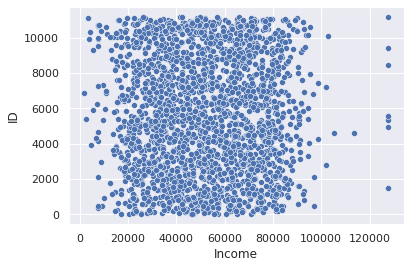

In [113]:
sns.scatterplot(data=df1, x="Income", y="ID")

**14. Handle the outlier values in the column Income. (3 points)**

- **1st Approach**: Drop the instances where income is greater than 1,50,000, save it in
df2
- **2nd Approach**: Drop the instances which have outlier values using the IQR, save it
in df3
- **3rd Approach**: Cap the instances to max or min value using the IQR, save it in df4

In [114]:
# 1st Approach
df2.drop(df2[df2['Income'] > 150000].index, inplace = True)
df2.reset_index(drop=True, inplace=True)

/home/nastia/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [115]:
print('Max income ', df2.Income.max())
print('Min income ', df2.Income.min())

Max income  127766.48
Min income  1730.0


In [116]:
# # 2st Approach
q00percent = df3.Income.quantile(q=0.00)
q100percent = df3.Income.quantile(q=1)

df3.drop(df3[df3['Income'] > q100percent].index, inplace = True)
df3.drop(df3[df3['Income'] < q00percent].index, inplace = True)

print('Max income ', df3.Income.max())
print('Min income ', df3.Income.min())

Max income  127766.48
Min income  1730.0


In [117]:
# 3st Approach
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

lr,ur = remove_outlier(df4['Income'])
print("lower range",lr, "and upper range", ur)

lower range -13587.75 and upper range 117416.25


In [118]:
df4['Income']=np.where(df4['Income']>ur, ur, df4['Income'])
df4['Income']=np.where(df4['Income']<lr, lr, df4['Income'])

In [119]:
print('Max income ', df4.Income.max())
print('Min income ', df4.Income.min())

Max income  117416.25
Min income  1730.0


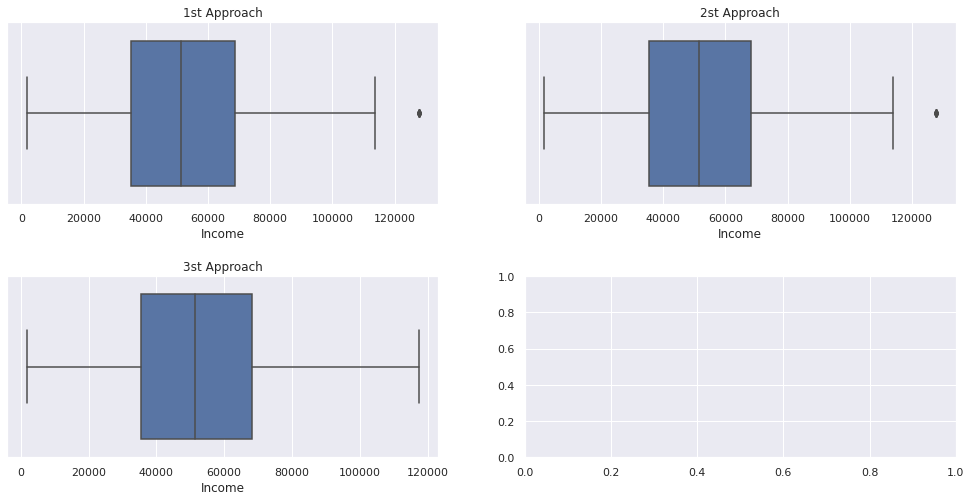

In [120]:
fig_size = (17, 8)
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=fig_size)
sns.boxplot(x= 'Income', data=df2, ax=axs[0][0]).set_title('1st Approach')
sns.boxplot(x= 'Income', data=df3, ax=axs[0][1]).set_title('2st Approach')

sns.boxplot(x= 'Income', data=df4, ax=axs[1][0]).set_title('3st Approach')
plt.subplots_adjust(hspace = 0.4)
plt.show()

**15. Scale the data in column 'Income' to have mean=0 and standard deviation = 1. ( 1
points)**

In [126]:
from scipy import stats

scaler = StandardScaler()
data = df2.Income.values.reshape(-1, 1)
scaler.fit(data)
a = scaler.transform(data)
print(a.mean())
print(a.std())
df2['Income'] = a.flatten()

-2.0841731870219546e-17
1.0


<ipython-input-126-9a395cfcfc96>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Income'] = a.flatten()


In [128]:
df2

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,1826,1970,2,1.555370,0,0,20140616,0,189,104,...,0,0,0,0,0,0,0,0,1,0
1,1,1961,2,0.244810,0,0,20140615,0,464,5,...,0,0,0,1,0,0,0,0,0,0
2,10476,1958,2,0.725499,0,1,20140513,0,134,11,...,0,0,0,0,0,0,0,0,0,1
3,1386,1967,2,-0.918039,1,1,20140511,0,10,0,...,1,0,0,0,0,0,0,0,0,0
4,5371,1989,2,-1.437652,1,0,20140408,0,6,16,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10142,1976,4,0.688134,0,1,20130307,99,372,18,...,0,0,0,0,0,0,0,0,0,1
2212,5263,1977,5,-0.985022,1,0,20130122,99,5,10,...,0,0,0,0,0,0,0,0,1,0
2213,22,1976,2,-0.264459,1,0,20121203,99,185,2,...,0,0,0,0,0,0,0,0,1,0
2214,528,1978,2,0.657099,0,0,20121129,99,267,38,...,0,0,0,0,0,1,0,0,0,0
